During data analysis and modeling, a significant amount of time is spent on data preparation:

    loading, cleaning, transforming and rearranging.
    Such tasks are often reported to take up 80% or more of an analyst's time.
    

## 1. Handling Missing Data

For, numeric data, pandas uses the floating-point value <b> NaN </b> (Not a Number) to represent missing data.

In [1]:
# import pandas, numpy library
import pandas as pd
import numpy as np

In [2]:
string_data = pd.Series(["aardvark","aertichoke", np.nan, "avocado"])

In [3]:
string_data

0      aardvark
1    aertichoke
2           NaN
3       avocado
dtype: object

In [4]:
# check NULL data by TRUE/FALSE
string_data.isnull()

0    False
1    False
2     True
3    False
dtype: bool

In [5]:
# count(sum) total null data
string_data.isnull().sum() # only 1 NaN

1

In [6]:
# Count not-NULL data
string_data.notnull().sum()

3

In [7]:
string_data[0]

'aardvark'

###### Missing data (NA-not available) --- IN statistics applications, NA data may either be data that doesn't exist or that exists but was not observed (through problems with data collection, for example.)


When cleaning up data for analysis, it is often important to do analysis on the missing data itself to identify data collection problems or potential biases in the data caused by missing data.

The built-in Python <b> None </b> value is also treated as <b> NA </b> in object arrays:

code:

In [8]:
string_data[0]=None

In [9]:
print(string_data)

0          None
1    aertichoke
2           NaN
3       avocado
dtype: object


In [10]:
# check NULL
string_data.isnull()  # None is also considered as NULL

0     True
1    False
2     True
3    False
dtype: bool

In [11]:
string_data.isnull().sum()

2

### Filtering Out Missing Data

There are a few ways to filter out missing data.

 using <I>pandas.isnull</I> and boolean indexing, the <I>dropna</I> can be helpfull.


In [12]:
from numpy import nan as NA

In [13]:
data = pd.Series([1, NA, 3.5, NA, 7])

In [14]:
data

0    1.0
1    NaN
2    3.5
3    NaN
4    7.0
dtype: float64

In [15]:
data.notnull()

0     True
1    False
2     True
3    False
4     True
dtype: bool

In [16]:
# drop NA 
data.dropna()

0    1.0
2    3.5
4    7.0
dtype: float64

Signature: <b>data.dropna(axis=0, inplace=False, how=None)</b>

Docstring:

Return a new Series with missing values removed.

In [17]:
# take only not-null value by boolean-indexing
data[data.notnull()]

0    1.0
2    3.5
4    7.0
dtype: float64

With DataFrame objects, things are a bit more complex

You may want to drop rows or columns that are all NA <u> or </U> only those containing any NAs.

dropna() -- by default drops any row containing a missing value.

In [18]:
data = pd.DataFrame([[1.,6.5,3.],[1., NA, NA],
                    [NA, NA, NA], [NA, 6.5,3]])

In [19]:
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [20]:
# remove rows containing any NA
cleaned = data.dropna()
cleaned # having only those rows, which do not contain any NA

,0,1,2
0,1.0,6.5,3.0


Signature:<b>
data.dropna(
    axis: 'Axis' = 0,
    how: 'str' = 'any',
    thresh=None,
    subset=None,
    inplace: 'bool' = False,
)</b>

Docstring:
Remove missing values.

passing how="all"

In [21]:
data.dropna(how="all")  # deop only those rows, contains all values as NA

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


To drop columns in the same way----pass---axis=1

In [22]:
data[0]  # column

0    1.0
1    1.0
2    NaN
3    NaN
Name: 0, dtype: float64

In [23]:
data[4]=NA # add NA column
data

,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [24]:
data.dropna(axis=1, how="all")

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [25]:
data # data remains intact --unless inplace=True

,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [26]:
data.dropna(axis=1) # empty DataFrame

""
0
1
2
3


A related way to filter out DataFrame rows tends to concern time-series data.

Suppose you want to keep only rows containing a certain number of observations. You can indictae this with the <b> thresh</b> arguments:
    

In [27]:
df = pd.DataFrame(np.random.randn(7,3))

In [28]:
df

,0,1,2
0,-0.957463,-0.797934,1.149987
1,0.652243,-2.166430,1.220731
2,-1.179616,0.856038,-0.883605
3,0.982324,1.326063,0.433709
4,-0.188639,-0.032771,0.213367
5,-1.154416,-1.174188,0.463009
6,-0.685162,-0.757196,-0.650447


In [29]:
df.iloc[:4,1]=NA

In [30]:
df.iloc[:2,2] = NA

In [31]:
df

,0,1,2
0,-0.957463,NaN,NaN
1,0.652243,NaN,NaN
2,-1.179616,NaN,-0.883605
3,0.982324,NaN,0.433709
4,-0.188639,-0.032771,0.213367
5,-1.154416,-1.174188,0.463009
6,-0.685162,-0.757196,-0.650447


In [32]:
df.dropna() # drop rows contain any NA

,0,1,2
4,-0.188639,-0.032771,0.213367
5,-1.154416,-1.174188,0.463009
6,-0.685162,-0.757196,-0.650447


In [33]:
# thresh
df.dropna(thresh=2)  # resulting row should contain minimum 2 non-NA values(columns)

,0,1,2
2,-1.179616,NaN,-0.883605
3,0.982324,NaN,0.433709
4,-0.188639,-0.032771,0.213367
5,-1.154416,-1.174188,0.463009
6,-0.685162,-0.757196,-0.650447


In [34]:
df.dropna(thresh=3) # resulting row should contain minimum 3 non-NA values(columns)

,0,1,2
4,-0.188639,-0.032771,0.213367
5,-1.154416,-1.174188,0.463009
6,-0.685162,-0.757196,-0.650447


## Filling In Misiing Data

###### fillna()

In [35]:
df.fillna(0)  # by default inplace=False

,0,1,2
0,-0.957463,0.000000,0.000000
1,0.652243,0.000000,0.000000
2,-1.179616,0.000000,-0.883605
3,0.982324,0.000000,0.433709
4,-0.188639,-0.032771,0.213367
5,-1.154416,-1.174188,0.463009
6,-0.685162,-0.757196,-0.650447


In [36]:
# Calling fillna with a dict, use a different fill value for each column.

df.fillna({1:0.5, 2:0})

,0,1,2
0,-0.957463,0.500000,0.000000
1,0.652243,0.500000,0.000000
2,-1.179616,0.500000,-0.883605
3,0.982324,0.500000,0.433709
4,-0.188639,-0.032771,0.213367
5,-1.154416,-1.174188,0.463009
6,-0.685162,-0.757196,-0.650447


In [37]:
#  inplace=TRUE

_ = df.fillna(0, inplace=True)

In [38]:
df

,0,1,2
0,-0.957463,0.000000,0.000000
1,0.652243,0.000000,0.000000
2,-1.179616,0.000000,-0.883605
3,0.982324,0.000000,0.433709
4,-0.188639,-0.032771,0.213367
5,-1.154416,-1.174188,0.463009
6,-0.685162,-0.757196,-0.650447


The same interpolation methods available for reindexing can be used with fillna()

In [39]:
df =pd.DataFrame(np.random.randn(6,3))

In [40]:
df.iloc[2:,1 ] = NA

In [41]:
df.iloc[4:,2] = NA

In [42]:
df

,0,1,2
0,-0.317911,0.719194,-0.381721
1,0.113207,-0.303063,-0.573900
2,-0.040870,NaN,-0.069457
3,-1.128103,NaN,0.594161
4,0.779970,NaN,NaN
5,-0.286405,NaN,NaN


In [43]:
df.fillna(method="ffill") # method="ffill"

,0,1,2
0,-0.317911,0.719194,-0.381721
1,0.113207,-0.303063,-0.573900
2,-0.040870,-0.303063,-0.069457
3,-1.128103,-0.303063,0.594161
4,0.779970,-0.303063,0.594161
5,-0.286405,-0.303063,0.594161


In [44]:
df.fillna(method="ffill", limit=2) # ffill upto 2(limit) in each column

,0,1,2
0,-0.317911,0.719194,-0.381721
1,0.113207,-0.303063,-0.573900
2,-0.040870,-0.303063,-0.069457
3,-1.128103,-0.303063,0.594161
4,0.779970,NaN,0.594161
5,-0.286405,NaN,0.594161


In [45]:
df.fillna(method="bfill") # since here no element after NA exists

,0,1,2
0,-0.317911,0.719194,-0.381721
1,0.113207,-0.303063,-0.573900
2,-0.040870,NaN,-0.069457
3,-1.128103,NaN,0.594161
4,0.779970,NaN,NaN
5,-0.286405,NaN,NaN


In [46]:
df.join(pd.Series([0.5,0.4,0.3,0.2], name=3)) # add a column by "join"  #oroginal df not changed

,0,1,2,3
0,-0.317911,0.719194,-0.381721,0.5
1,0.113207,-0.303063,-0.573900,0.4
2,-0.040870,NaN,-0.069457,0.3
3,-1.128103,NaN,0.594161,0.2
4,0.779970,NaN,NaN,NaN
5,-0.286405,NaN,NaN,NaN


In [47]:
df.iloc[5,2]=1

In [48]:
df

,0,1,2
0,-0.317911,0.719194,-0.381721
1,0.113207,-0.303063,-0.573900
2,-0.040870,NaN,-0.069457
3,-1.128103,NaN,0.594161
4,0.779970,NaN,NaN
5,-0.286405,NaN,1.000000


In [49]:
df.fillna(method="bfill")  # "bfill" utilises here.

,0,1,2
0,-0.317911,0.719194,-0.381721
1,0.113207,-0.303063,-0.573900
2,-0.040870,NaN,-0.069457
3,-1.128103,NaN,0.594161
4,0.779970,NaN,1.000000
5,-0.286405,NaN,1.000000


With <b>fillna</b> you can do lots of other things with a little creativity.
as passs the <b>mean/median</b> value from a Series

In [50]:
data = pd.Series([1., NA, 3.5, NA, 7])

In [51]:
data.fillna(data.mean())

0    1.000000
1    3.833333
2    3.500000
3    3.833333
4    7.000000
dtype: float64

In [52]:
df.fillna(value=df.mean()) # fill NA with mean of respective column

,0,1,2
0,-0.317911,0.719194,-0.381721
1,0.113207,-0.303063,-0.573900
2,-0.040870,0.208065,-0.069457
3,-1.128103,0.208065,0.594161
4,0.779970,0.208065,0.113817
5,-0.286405,0.208065,1.000000


In [53]:
df.mean()

0   -0.146685
1    0.208065
2    0.113817
dtype: float64

## Data Transformation

### Removing Duplicates

Duplicates rows may be found in a DataFrame for any number of reasons.

In [54]:
data = pd.DataFrame({"k1":["one","two"]*3+["two"], "k2":[1,1,2,3,3,4,4]})

In [55]:
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


duplicated()

In [56]:
data.duplicated()  # check whether each row is a duplicate ( has been observed in a previous row)

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

drop_duplicates()

In [57]:
data.drop_duplicates()

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


 By default, both of these methods consider all of the columns

In [58]:
#Suppose we have an additional column of values and wanted to filter duplicates only based on the "k1" column

data["v1"] = range(7)

data.drop_duplicates(["k1"])

,k1,k2,v1
0,one,1,0
1,two,1,1


In [59]:
data

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
5,two,4,5
6,two,4,6


In [60]:
data.drop_duplicates(["k1","k2"], keep="last")  # remove index-5 row instead of index-6 row because of keep="last"

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
6,two,4,6


### Transorming Data Using a Function or Mapping

In [61]:
data = pd.DataFrame({'food':['bacon',"pulled pork", "bacon",
                            "pastraml","corned beef", "Bacon",
                            "pastraml", "honey ham", "nova lox"],
                    'onces': [4,3,12,6,7.5, 8, 3, 5 ,6]})

In [62]:
data

,food,onces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,pastraml,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastraml,3.0
7,honey ham,5.0
8,nova lox,6.0


Suppose you wanted to add a column indicating the type of animal that each food came from.

In [63]:
meat_to_animal = {
    "bacon":"pig",
    "pulled pork":"pig",
    "pastraml":"cow",
    "corned beef":"cow",
    "honey ham": "pig",
    "nova lox" : "salmon"
}

In [64]:
meat_to_animal

{'bacon': 'pig',
 'pulled pork': 'pig',
 'pastraml': 'cow',
 'corned beef': 'cow',
 'honey ham': 'pig',
 'nova lox': 'salmon'}

Here we have a prbolem in that some of the meats are capitalized and others are not. thus, we need to convert each value to lowercase using the str.lower() Series method

map()

In [65]:
lowercased = data['food'].str.lower()
lowercased

0          bacon
1    pulled pork
2          bacon
3       pastraml
4    corned beef
5          bacon
6       pastraml
7      honey ham
8       nova lox
Name: food, dtype: object

map()

In [66]:
data["food"].map(meat_to_animal)

0       pig
1       pig
2       pig
3       cow
4       cow
5       NaN
6       cow
7       pig
8    salmon
Name: food, dtype: object

In [67]:
data['animal'] = lowercased.map(meat_to_animal)
data["animal"]

0       pig
1       pig
2       pig
3       cow
4       cow
5       pig
6       cow
7       pig
8    salmon
Name: animal, dtype: object

In [68]:
data

,food,onces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,pastraml,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastraml,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


We could also have passsed a function that does all the work:

In [69]:
data["food"].map(lambda x: meat_to_animal[x.lower()])

0       pig
1       pig
2       pig
3       cow
4       cow
5       pig
6       cow
7       pig
8    salmon
Name: food, dtype: object

Using <b>map</b> is a convenient way to perform element-wise transformations and oher data cleaning-related operations.

### Replacing Values

In [70]:
data = pd.Series([1., -999., 2., -999., -1000., 3.])

In [71]:
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

The -999 values might be sentinel values for missing data.

In [72]:
data.replace(-999, np.nan) # original data doesn't change because by default---inplace=False

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

Replace multiple values at once, pass a list and then the substitute value:

In [73]:
data.replace([-999, -1000], np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

In [74]:
#To use a different replacement for each value, pass a list of substitutes:

data.replace([-999, -1000],[np.nan, 0])

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

In [75]:
# The argument passed can also be a dict:

data.replace({-999:np.nan, -1000:0})

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

The <b> data.replace </b> method is distinct from <b>data.str.replace</b>, which performs string substitution element-wise.

### Renaming Axis Indexes

In [76]:
data = pd.DataFrame(np.arange(12).reshape((3,4)),
                   index=["Ohio","Colorado","New York"],
                   columns=["one","two","three","four"])

In [77]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [78]:
#Like a Series, the axis indexes have a map method:

In [79]:
transform = lambda x: x[:4].upper()

In [80]:
transform("ohio")

'OHIO'

In [81]:
data.index

Index(['Ohio', 'Colorado', 'New York'], dtype='object')

In [82]:
data.index.map(transform)

Index(['OHIO', 'COLO', 'NEW '], dtype='object')

In [83]:
# modifying the data-frame in-place

data.index = data.index.map(transform)

In [84]:
data

,one,two,three,four
OHIO,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


If you want to create a transformed version of a dataset without modifying the original, a useful method is <b>"rename"</b>

In [85]:
data.rename(index=str.title, columns=str.upper)

,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colo,4,5,6,7
New,8,9,10,11


In [86]:
# rename can be used in conjunction with a dict-like object providing new values for a subset of the axis labels

data.rename(index={'OHIO':'INDIANA'},
           columns={'three':'peekaboo'})

,one,two,peekaboo,four
INDIANA,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


In [87]:
type(data.index)

pandas.core.indexes.base.Index

In [88]:
# to modify a dataset in-place, pass inplace=True

data.rename(index={"OHIO":"INDIANA"}, inplace=True)

In [89]:
data

,one,two,three,four
INDIANA,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


### Discretization and Bining

Continuous data is often discretized or otherwise seperated into "bins" for analysis.

In [90]:
#Suppose you have data about a group of people in a study, and you want to group them into discrete age buckets:

ages = [20,22,25,27,21,23,37,31,61,45,41,32]

In [91]:
bins=[18,25,35,60,100]

Let's divide these into bins of 18 to 25,26 to 35,36 to 60,and finally 61 and older.

To do so, you have to use<b> "cut"</b>, a function in pandas

In [92]:
cats = pd.cut(ages, bins)

In [93]:
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64, right]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

The object pandas returns is a special <b> Categorical </b> object.

The ouput describes the bins computed by <b>pandas.cut</b>

In [94]:
# Labelling for the ages data in the "codes" attribute
cats.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [95]:
cats.categories   # you can pass right=False

IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]], dtype='interval[int64, right]')

In [96]:
pd.value_counts(cats)  #bin counts

(18, 25]     5
(25, 35]     3
(35, 60]     3
(60, 100]    1
dtype: int64

In [97]:
pd.cut(ages, [18,26,36,61,100], right=False)

[[18, 26), [18, 26), [18, 26), [26, 36), [18, 26), ..., [26, 36), [61, 100), [36, 61), [36, 61), [26, 36)]
Length: 12
Categories (4, interval[int64, left]): [[18, 26) < [26, 36) < [36, 61) < [61, 100)]

In [98]:
# pass own bin names by passing a list of arra to the "labels" optiions

group_names = ["Youth","YoungAdult", "MiddleAged", "Senior"]
pd.cut(ages, bins, labels=group_names)

['Youth', 'Youth', 'Youth', 'YoungAdult', 'Youth', ..., 'YoungAdult', 'Senior', 'MiddleAged', 'MiddleAged', 'YoungAdult']
Length: 12
Categories (4, object): ['Youth' < 'YoungAdult' < 'MiddleAged' < 'Senior']

If you pass an integer number of bins to cut instead of explicit bin edges, it will compute equal-length bins based on the
minimum and maximum values in the data.

Consider the case of some uniformly distributed data chopped into fourths:
    

In [99]:
data = np.random.rand(20)

In [100]:
pd.cut(data, 4,)

[(0.71, 0.943], (0.245, 0.478], (0.71, 0.943], (0.245, 0.478], (0.0114, 0.245], ..., (0.0114, 0.245], (0.71, 0.943], (0.245, 0.478], (0.71, 0.943], (0.0114, 0.245]]
Length: 20
Categories (4, interval[float64, right]): [(0.0114, 0.245] < (0.245, 0.478] < (0.478, 0.71] < (0.71, 0.943]]

In [101]:
data_cut = pd.cut(data, 4, precision=2)
data_cut

[(0.71, 0.94], (0.25, 0.48], (0.71, 0.94], (0.25, 0.48], (0.011, 0.25], ..., (0.011, 0.25], (0.71, 0.94], (0.25, 0.48], (0.71, 0.94], (0.011, 0.25]]
Length: 20
Categories (4, interval[float64, right]): [(0.011, 0.25] < (0.25, 0.48] < (0.48, 0.71] < (0.71, 0.94]]

In [102]:
pd.value_counts(data_cut)

(0.71, 0.94]     8
(0.25, 0.48]     7
(0.011, 0.25]    3
(0.48, 0.71]     2
dtype: int64

In [103]:
data_cut.value_counts()

(0.011, 0.25]    3
(0.25, 0.48]     7
(0.48, 0.71]     2
(0.71, 0.94]     8
dtype: int64

###### qcut()

qcut() -- bins the data based on sample quantiles.

Depending on the distribution of the data, using <b>cut</b> will not usually result in each bin having the same number of data points. 

Since <b> qcut() </b> uses sample quantiles instead, by definition -- obtain roughly equal-size bins.m

In [104]:
data = np.random.randn(1000)  #normally distributed

(array([ 11.,  49., 114., 165., 237., 200., 130.,  69.,  21.,   4.]),
 array([-2.78079354, -2.18866642, -1.59653929, -1.00441217, -0.41228505,
         0.17984207,  0.7719692 ,  1.36409632,  1.95622344,  2.54835056,
         3.14047768]),
 <a list of 10 Patch objects>)

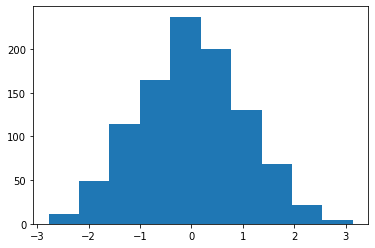

In [105]:
import matplotlib.pyplot as plt
plt.hist(data)

In [106]:
cats = pd.cut(data, 4) #cut into quantiles

In [107]:
cats

[(-1.3, 0.18], (0.18, 1.66], (-1.3, 0.18], (-1.3, 0.18], (-1.3, 0.18], ..., (1.66, 3.14], (-1.3, 0.18], (-1.3, 0.18], (-1.3, 0.18], (-1.3, 0.18]]
Length: 1000
Categories (4, interval[float64, right]): [(-2.787, -1.3] < (-1.3, 0.18] < (0.18, 1.66] < (1.66, 3.14]]

In [108]:
pd.value_counts(cats)

(-1.3, 0.18]      472
(0.18, 1.66]      377
(-2.787, -1.3]    104
(1.66, 3.14]       47
dtype: int64

Similar to cut you can pass your own quantiles (numbers between 0 and 1, inclusive):

In [109]:
pd.qcut(data, [0,0.1,0.5,0.9,1.])

[(-1.325, -0.0168], (-0.0168, 1.333], (-1.325, -0.0168], (-0.0168, 1.333], (-0.0168, 1.333], ..., (1.333, 3.14], (-1.325, -0.0168], (-1.325, -0.0168], (-1.325, -0.0168], (-1.325, -0.0168]]
Length: 1000
Categories (4, interval[float64, right]): [(-2.782, -1.325] < (-1.325, -0.0168] < (-0.0168, 1.333] < (1.333, 3.14]]

## Detecting and Filtering Outliers

Filtering and transforming outliers is largly a matter of applying array operations.

In [110]:
data = pd.DataFrame(np.random.randn(1000,4))

In [111]:
data

,0,1,2,3
0,-0.092583,0.038818,1.720909,-0.244775
1,0.776828,0.116824,0.720204,1.985783
2,0.030083,-0.205529,-1.073398,0.231607
3,0.388716,0.195292,-2.454540,-1.175519
4,-1.083706,0.251948,0.468986,0.742374
...,...,...,...,...
995,-0.562750,-0.317449,-0.213451,0.497351
996,-0.939108,1.799399,0.225724,0.322294
997,1.207177,-0.342891,-2.047208,0.021444
998,2.057262,-1.661412,-0.104370,-1.168599


In [112]:
data.describe() #statistical summary

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.007602,0.025829,0.014271,-0.027393
std,0.999742,0.994184,0.990092,0.971823
min,-3.159658,-3.189163,-3.147272,-3.560408
25%,-0.681803,-0.698437,-0.651503,-0.685484
50%,-0.016811,0.024878,-0.009442,-0.031810
75%,0.652618,0.679809,0.675798,0.643723
max,3.600144,3.458643,3.053386,3.375755


In [113]:
# find values in one of the columns exceeding 3 in abslute value:
col=data[2]
col[np.abs(col)>3]

166   -3.147272
947    3.053386
Name: 2, dtype: float64

In [114]:
# Select all rows having a value exceeding 3 or -3, you can use the "any" method on a boolean DataFrame.

data[(np.abs(data)>3).any(axis=1)]

,0,1,2,3
118,0.375998,3.246541,-0.260189,-0.208275
166,0.629356,-1.013369,-3.147272,0.669036
273,-0.388197,-1.611135,-0.935707,-3.560408
339,1.449114,-3.189163,0.288993,0.263447
377,0.706020,1.020509,1.903306,3.375755
512,-3.159658,0.739579,0.156315,-0.255731
533,3.600144,0.619786,-0.268515,-0.070458
774,-0.069096,3.458643,-2.379675,0.384504
861,3.328015,-0.005555,0.618290,-0.577949
902,-3.030248,1.399031,-0.409782,-0.076603


In [115]:
np.sign(data)

,0,1,2,3
0,-1.0,1.0,1.0,-1.0
1,1.0,1.0,1.0,1.0
2,1.0,-1.0,-1.0,1.0
3,1.0,1.0,-1.0,-1.0
4,-1.0,1.0,1.0,1.0
...,...,...,...,...
995,-1.0,-1.0,-1.0,1.0
996,-1.0,1.0,1.0,1.0
997,1.0,-1.0,-1.0,1.0
998,1.0,-1.0,-1.0,-1.0


Values can be set based on criteria. Here is code to cap values outside the interval -3 to 3.

In [116]:
data[np.abs(data)>3] = np.sign(data)*3

In [117]:
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.008340,0.025313,0.014365,-0.027208
std,0.996123,0.991337,0.989470,0.968696
min,-3.000000,-3.000000,-3.000000,-3.000000
25%,-0.681803,-0.698437,-0.651503,-0.685484
50%,-0.016811,0.024878,-0.009442,-0.031810
75%,0.652618,0.679809,0.675798,0.643723
max,3.000000,3.000000,3.000000,3.000000


## Permutation and Random Sampling

Permuting (randomly reordering) a Series or the rows in a DataFrame is easy to do usig the <b>numpy.random.permutation</b> function.

In [118]:
df = pd.DataFrame(np.arange(5*4).reshape((5,4)))

In [119]:
df

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


 'DataFrame' object has no attribute 'reshape'

In [120]:
sampler = np.random.permutation(5)

In [121]:
sampler

array([2, 3, 1, 4, 0])

That array can then be used in "i-loc"-based indexing or theequivalent "take" function:

In [122]:
df.take(sampler)

,0,1,2,3
2,8,9,10,11
3,12,13,14,15
1,4,5,6,7
4,16,17,18,19
0,0,1,2,3


In [123]:
df.iloc[sampler,:]

,0,1,2,3
2,8,9,10,11
3,12,13,14,15
1,4,5,6,7
4,16,17,18,19
0,0,1,2,3


In [124]:
df.iloc[sampler]

,0,1,2,3
2,8,9,10,11
3,12,13,14,15
1,4,5,6,7
4,16,17,18,19
0,0,1,2,3


To select a random subset without replacement, use the<b> "sample" </b>method on Series and DataFrame:

In [125]:
df.sample(3)

,0,1,2,3
1,4,5,6,7
3,12,13,14,15
4,16,17,18,19


To generate a "sample" with replacement (to allow repeat choices), pass replace=True to sample.

In [126]:
choices = pd.Series([5,7,-1,6,4])

In [127]:
draws = choices.sample(n=10, replace=True)

In [128]:
draws

2   -1
0    5
3    6
2   -1
0    5
1    7
1    7
1    7
3    6
1    7
dtype: int64

ValueError: Cannot take a larger sample than population when 'replace=False'

## Computing Indicator/Dummy Variables

Converting a categorical variable into a<b> "dummy"</b> or <b>"indicator"</b> matrix

If a column in a DataFrame has k distinct values, you would derive a matrix or DataFrame with k columns consisting
all 1s and 0s. pandas has a <b>get_dummies </b>function

In [129]:
df = pd.DataFrame({"key":['b','b','a','c','a','b'], "data1": range(6)})

In [130]:
df

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [131]:
pd.get_dummies(df["key"])

,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [132]:
# add prefix
dummies = pd.get_dummies(df["key"], prefix="key")

In [133]:
dummies

,key_a,key_b,key_c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [134]:
df[["data1"]]  # DataFrame

,data1
0,0
1,1
2,2
3,3
4,4
5,5


In [135]:
df_with_dummy = df[["data1"]].join(dummies)

In [136]:
df_with_dummy

,data1,key_a,key_b,key_c
0,0,0,1,0
1,1,0,1,0
2,2,1,0,0
3,3,0,0,1
4,4,1,0,0
5,5,0,1,0


## String Manipulation

split() -- a comma seperated string can be broken into pieces with split

In [137]:
val ="a,b , guido"

In [138]:
type(val) #type-string

str

In [139]:
val.split(sep=",")

['a', 'b ', ' guido']

In [140]:
val.split()

['a,b', ',', 'guido']

<b>split</b> is often combine with <b>strip</b> totrim whitespace (including line breaks):

In [141]:
pieces = [x.strip() for x in val.split(',')]

In [142]:
pieces

['a', 'b', 'guido']

In [143]:
val.strip()

'a,b , guido'

In [144]:
val

'a,b , guido'

In [145]:
val.lstrip(" ")

'a,b , guido'

In [146]:
val.rstrip( )

'a,b , guido'

In [147]:
val.strip().split()

['a,b', ',', 'guido']

These substrings could be concatenated together with a two-colon delimiter using addition:

In [148]:
first, second, third = pieces

In [149]:
first, second, third

('a', 'b', 'guido')

In [150]:
first +"::" + second + "::" + third

'a::b::guido'

But this isn't a practical generic method.

A faster and more Pythonic way is to pass a list or tuple to the <b>join</b> method on the string '::'

In [151]:
"::".join(pieces)

'a::b::guido'

Cocern locating substrings [index, find]

In [152]:
'guido' in val

True

In [153]:
val

'a,b , guido'

In [154]:
'guid' in val

True

In [155]:
"b " in val

True

In [156]:
"b  " in val

False

In [157]:
val.index(",") #Raises ValueError when the substring is not found.

1

In [158]:
val.find(',')

1

In [159]:
val.find(':')  #Return -1 on failure.

-1

In [160]:
val.find(" ")

3

In [161]:
#---------------------------------------------------------------------------
#ValueError                                Traceback (most recent call last)
#<ipython-input-240-2c016e7367ac> in <module>
#----> 1 val.index(':')

#ValueError: substring not found
#val.index(":")

In [162]:
val.count(",")  #number of occurance of a particular substring

2

replace()

In [163]:
val.replace(",","::")

'a::b :: guido'

In [164]:
val.replace(",","")

'ab  guido'

In [165]:
val

'a,b , guido'

# Regular Expressions

<I> Regular expressions</I> provide a flexible way to <b>search or match</b> (often more complex) <b>string patterns in text.</b>

<b>regex</b> -- is a  string formed according to the regular expression language.

Python built-in <b>re</b> module is responsible for applying regular expressions to string.

<b>@ re module </b> functions fall into <b>3 categories :</b>
    1. pattern matching
    2. substitution
    3. splitting

<b> \s+

Suppose we wanted to split a string with a variable number of whitespace characters (tabs, spaces, and new-lines).
The <I> regex </I> describing one or more whitespace characters is <b> \s+ :

In [166]:
import re

In [167]:
text = "foo  bar\t baz  \tqux"

In [168]:
text

'foo  bar\t baz  \tqux'

In [169]:
print(text)

foo  bar	 baz  	qux


In [170]:
re.split("\s+", text)

['foo', 'bar', 'baz', 'qux']

When you call re.split("\s+", text), the regular expression is first <I> compiled</I> and then its <I> split</I> method is called on the passed text.

You can compile the <I> regex </I> yourself with <b>re.compile</b> , forming a reusuable regex object:

In [171]:
regex = re.compile("\s+")

In [172]:
regex

re.compile(r'\s+', re.UNICODE)

In [173]:
regex.split(text)

['foo', 'bar', 'baz', 'qux']

In [174]:
# get  alist of all patterns matching the regex

regex.findall(text)

['  ', '\t ', '  \t']

Creating a regex object with re.compile is highly recommended if you intend to apply the same expression to many strings.

In [175]:
# Search the string to see if it starts with "The" and ends with "Spain":
import re

txt = "The rain in Spain"
x =re.search("^The.*Spain$", txt)

if x:
  print("YES! We have a match!")
else:
  print("No match")

YES! We have a match!


RegEx Functions

findall	--> Returns a list containing all matches

search	--> Returns a Match object if there is a match anywhere in the string

split	--> Returns a list where the string has been split at each match

sub	  -->  Replaces one or many matches with a string

<b>Metacharacters</b>

Metacharacters are characters with a special meaning:

<b>Special Sequences</b>

A special sequence is a <b>\ </b>followed by one of the characters in the list below, and has a special meaning:

Character	--Description--	Example	
\A	-- Returns a match if the specified characters are at the beginning of the string	"\AThe"	
\b	-- Returns a match where the specified characters are at the beginning or at the end of a word
(the "r" in the beginning is making sure that the string is being treated as a "raw string")	r"\bain"
r"ain\b"	
\B	 -- Returns a match where the specified characters are present, but NOT at the beginning (or at the end) of a word
(the "r" in the beginning is making sure that the string is being treated as a "raw string")	r"\Bain"
r"ain\B"	
\d	-- Returns a match where the string contains digits (numbers from 0-9)	"\d"	
\D	-- Returns a match where the string DOES NOT contain digits	"\D"	
\s	-- Returns a match where the string contains a white space character	"\s"	
\S	-- Returns a match where the string DOES NOT contain a white space character	"\S"	
\w	-- Returns a match where the string contains any word characters (characters from a to Z, digits from 0-9, and the underscore _ character)	"\w"	
\W	-- Returns a match where the string DOES NOT contain any word characters	"\W"	
\Z	-- Returns a match if the specified characters are at the end of the string	"Spain\Z"

<b>Sets</b>

A set is a set of characters inside a pair of square brackets [] with a special meaning:

Set	--> Description	
[arn]	--> Returns a match where one of the specified characters (a, r, or n) are present	
[a-n]	--> Returns a match for any lower case character, alphabetically between a and n	
[^arn]	--> Returns a match for any character EXCEPT a, r, and n	
[0123]	--> Returns a match where any of the specified digits (0, 1, 2, or 3) are present	
[0-9]	--> Returns a match for any digit between 0 and 9	
[0-5][0-9]	--> Returns a match for any two-digit numbers from 00 and 59	
[a-zA-Z]	--> Returns a match for any character alphabetically between a and z, lower case OR upper case	
[+]	--->  In sets, +, *, ., |, (), $,{} has no special meaning, so [+] means: return a match for any + character in the string

###### findall()

In [176]:
import re

txt ="The rain in Spain"
x = re.findall("ai", txt)

print(x)

['ai', 'ai']


In [177]:
x

['ai', 'ai']

In [178]:
# if no match occurs

txt = "The rain in Spain"
x = re.findall("Portugal", txt)
print(x)  #empty list

[]


###### search() 

In [179]:
import re

txt = "The rain in Spain"
x = re.search("\s", txt)
x
x.start()

3

In [180]:
txt = "The rain in Spain"
x = re.search("\s", txt)

print("The first white-space character is located in position:", x.start())

The first white-space character is located in position: 3


In [181]:
# If no matches are found, the value None is returned:

txt = "The rain in Spain"
x = re.search("Portugal", txt)
print(x)

None


###### split()

The split() function returns a list where the string has been split at each match:

In [182]:
txt = "The rain in Spain"
x = re.split("\s", txt)
print(x)

['The', 'rain', 'in', 'Spain']


In [183]:
txt = "The rain in Spain"
x = re.split("\s+", txt)
print(x)

['The', 'rain', 'in', 'Spain']


In [184]:
#You can control the number of occurrences by specifying the maxsplit parameter:

txt = "The rain in Spain"
x = re.split("\s", txt, maxsplit=1)
print(x)

['The', 'rain in Spain']


###### sub()

The sub() function replaces the matches with the text of your choice:

In [185]:
# Replace every white-space character with the number 9:

txt = "The rain in Spain"
x = re.sub("\s", "9", txt)
print(x)

The9rain9in9Spain


In [186]:
# Replace the first 2 occurrences:

txt = "The rain in Spain"
x = re.sub("\s", "9", txt,count=2)
print(x)

The9rain9in Spain


#### Match Object

A Match Object is an object containing information about the search and the result.

In [187]:
import re

txt = "The rain in Spain"
x = re.search("ai", txt)
print(x) #this will print an object

<re.Match object; span=(5, 7), match='ai'>


The Match object has properties and methods used to retrieve information about the search, and the result:

    .span() returns a tuple containing the start-, and end positions of the match.
    .string returns the string passed into the function
    .group() returns the part of the string where there was a match

In [188]:
txt = "The rainS in Spain"

#The regular expression looks for any words that starts with an upper case "S":
x = re.search(r"S\b.*\w+", txt)
print(x)

print(x.span()) #Print the position (start- and end-position) of the first match occurrence.

print(x.string)  #Print the string passed into the function:

print(x.group())  #Print the part of the string where there was a match.
x.start()

<re.Match object; span=(8, 18), match='S in Spain'>
(8, 18)
The rainS in Spain
S in Spain


8

In [189]:
txt = "The rainS in Spain"

#The regular expression looks for any words that starts with an upper case "S":
x = re.search(r"\bS\w+", txt)
print(x)

print(x.span()) #Print the position (start- and end-position) of the first match occurrence.

print(x.string)  #Print the string passed into the function:

print(x.group())  #Print the part of the string where there was a match.
x.start()

<re.Match object; span=(13, 18), match='Spain'>
(13, 18)
The rainS in Spain
Spain


13

match and search are closely related to findall.


findall-- returns all matches in a sting

search -- returns only the first match.

match -- only match at the beginning of the string.

In [190]:
# let's consider a block of text and a regular expression capable of identifying most email addresses:

text = '''Dave dave@google.com
Steve steve@gmail.com
Rob rob@gmail.com
Ryan ryan@yahoo.com
'''

In [191]:
text

'Dave dave@google.com\nSteve steve@gmail.com\nRob rob@gmail.com\nRyan ryan@yahoo.com\n'

In [192]:

pattern = r'[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}'

In [193]:
pattern

'[A-Z0-9._%+-]+@[A-Z0-9.-]+\\.[A-Z]{2,4}'

In [194]:
# re.IGNORECASE makes the regex case-insensitive

regex = re.compile(pattern, flags=re.IGNORECASE)

In [195]:
regex.findall(text)

['dave@google.com', 'steve@gmail.com', 'rob@gmail.com', 'ryan@yahoo.com']

In [196]:
regex.search(text)

<re.Match object; span=(5, 20), match='dave@google.com'>

In [197]:
m = regex.search(text)

text[m.start():m.end()]

'dave@google.com'

In [198]:
print(regex.match(text)) #only will match if the pattern occurs at the start of the string.

None


### Conclusion:

###### Effective data preparation can significantly improve productive by enabling you to apend more time analyzing data and less time getting it ready for analysis.